# Seismic data prediction project

## Data gathering

In [1]:
import os
import time
from obspy import read
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from obspy.core import Stream
from obspy.imaging.scripts.scan import Scanner

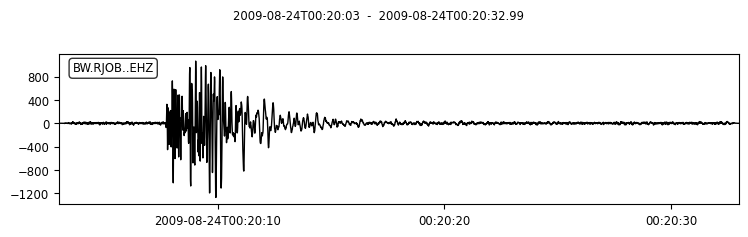

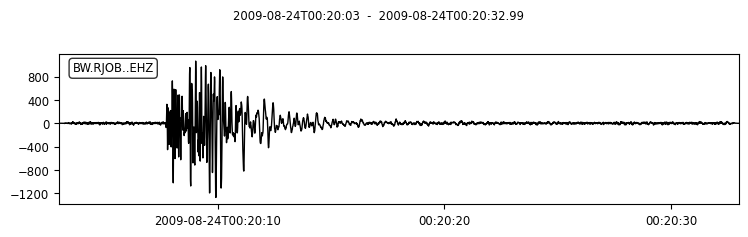

In [2]:
#example of seismogram plot
st = read()  # load example seismogram
st.filter(type='highpass', freq=3.0)
st = st.select(component='Z')
st.plot()

In [3]:
#Setting client
client = Client("IRIS")

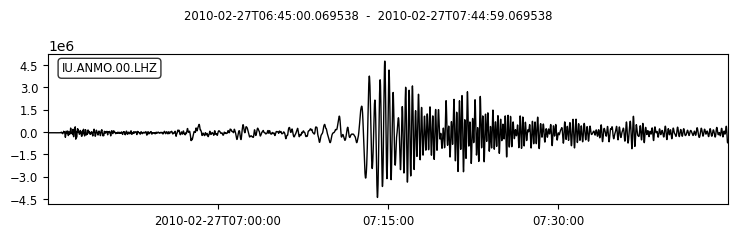

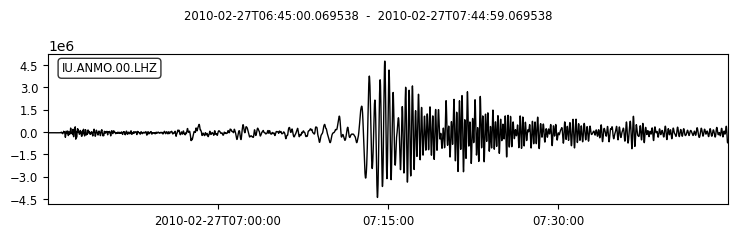

In [4]:
#get_waveform example
t = UTCDateTime("2010-02-27T06:45:00.000")
st = client.get_waveforms("IU", "ANMO", "00", "LHZ", t, t + 60 * 60)
st.plot()  

Inventory created at 2024-09-11T17:59:23.320400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2010-02-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IU
		Stations (4):
			IU.ADK (Adak, Aleutian Islands, Alaska)
			IU.AFI (Afiamalu, Samoa)
			IU.ANMO (Albuquerque, New Mexico, USA)
			IU.ANTO (Ankara, Turkey)
		Channels (0):



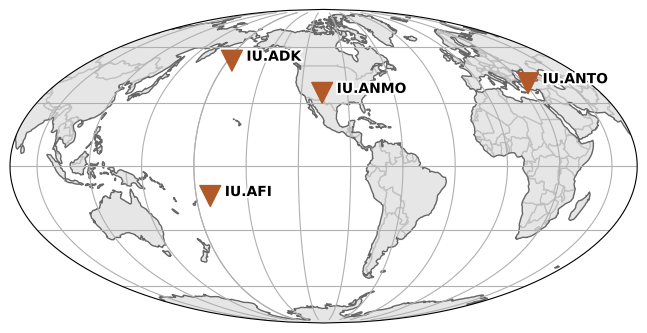

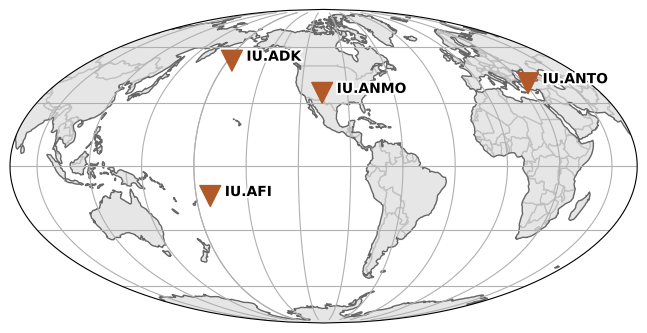

In [5]:
#get_station example
starttime=UTCDateTime("2010-02-27T06:45:00.000")
endtime=UTCDateTime("2011-02-27T06:45:00.000")
inventory = client.get_stations(network="IU", station="A*",
                                starttime=starttime,
                                endtime=endtime)
print(inventory)

inventory.plot()

In [6]:
starttime=UTCDateTime(2023, 1, 1)
endtime=UTCDateTime(2024, 1, 1)

network_list = client.get_stations(
    starttime=starttime, endtime=endtime, level="network")
print(network_list)

Inventory created at 2024-09-11T17:59:25.925600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (288):
			1A, 1E, 1F, 1G, 1L, 1Q, 1V, 2F, 2H, 2J, 2K, 2M, 2O, 2U, 2V, 3A, 3B
			3C, 3E, 3L, 3R, 4A, 4F, 4J, 4Q, 4T, 4U, 4Y, 5F, 5L, 5P, 6C, 6K, 
			6M, 6O, 6Q, 7D, 7G, 7O, 8A, 8F, 8H, 8Q, 8U, 8W, 9P, 9R, A2, A7, AB
			AC, AD, AE, AF, AG, AI, AK, AM, AO, AP, AR, AT, AU, AV, AX, AY, 
			AZ, BC, BE, BI, BK, BL, BN, BV, BX, C, C0, C1, C8, CA, CB, CC, CH, 
			CI, CM, CN, CO, CU, CW, CY, CZ, DE, DK, DR, DU, EC, EI, EN, EO, EP
			ER, ET, FA, G, GB, GD, GE, GF, GG, GH, GI, GM, GO, GR, GS, GT, HK
			HL, HT, HU, HV, IC, IE, II, IM, IN, IO, IP, IU, IV, IW, JM, JP, 
			K5, KC, KG, KN, KO, KP, KR, KS, KW, KY, KZ, LB, LD, LH, LI, LM, LO
			LX, MB, MC, MG, MH, MI, MM, MN, MP, MR, MS, MU, MX, MY, MZ, N4, 
			NA, NC, NE, NJ, NK, NL, NM, NN, NO, NP, NQ, NR

In [7]:
#Finding stations near Tultepec, Mexico, 19.6848° N, 99.1295° W
town = "Tultepec"
latitude = 19.6848
longitude = -99.1295
station_list = client.get_stations(
    starttime=starttime, endtime=endtime, latitude=latitude, longitude=longitude, maxradius="3", level="station")
print(station_list)

Inventory created at 2024-09-11T17:59:26.687500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (5):
			G, MG, MU, MX, SY
		Stations (16):
			G.UNM (Unam - Mexico, Mexico)
			MG.TXMV (CEIEPAA, FMVZ, UNAM, Tequisquiapan, Queretaro, MEXICO)
			MU.TLIG (TLIG)
			MU.TPIG (TPIG)
			MX.MOIG (Morelia, Mich, MX)
			MX.SJQ (Juriquilla, Queretaro, Mexico)
			MX.TLIG (TLAPA)
			SY.JRQG (JRQG synthetic)
			SY.MOIG (MOIG synthetic)
			SY.OXBV (OXBV synthetic)
			SY.OXNC (OXNC synthetic)
			SY.OXPL (OXPL synthetic)
			SY.SJQ (SJQ synthetic)
			SY.TLIG (TLIG synthetic)
			SY.UNM (UNM synthetic)
			SY.ZACA (ZACA synthetic)
		Channels (0):



Inventory created at 2024-09-11T17:59:26.979300Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			MX
		Stations (3):
			MX.MOIG (Morelia, Mich, MX)
			MX.SJQ (Juriquilla, Queretaro, Mexico)
			MX.TLIG (TLAPA)
		Channels (0):



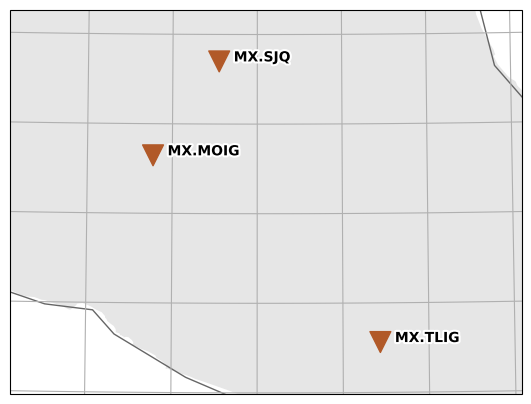

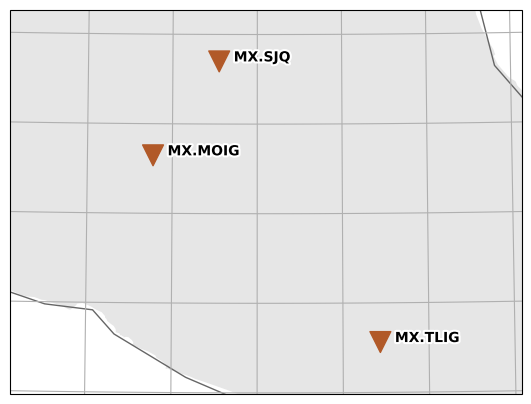

In [8]:
#filtering by network
station_list = client.get_stations(
    starttime=starttime, endtime=endtime, latitude=latitude, longitude=longitude, maxradius="3", network="MX",  level="station")
print(station_list)
station_list.plot(projection="local")

Text(-99.0295, 19.6848, 'Tultepec')

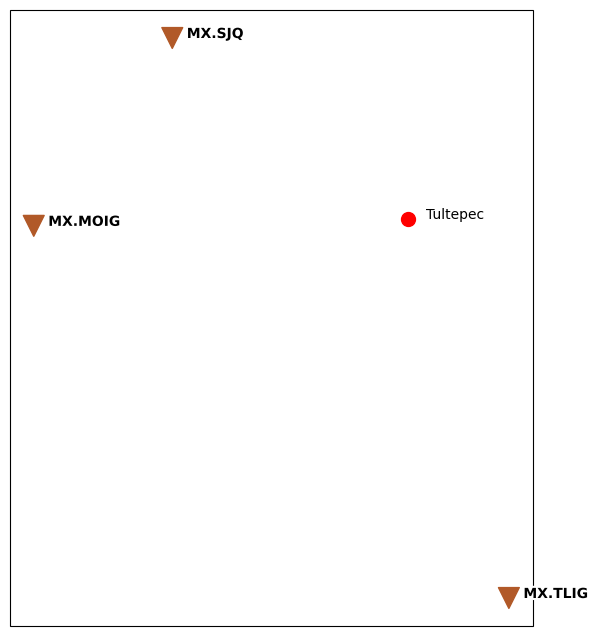

In [9]:
# Plot the station list
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
station_list.plot(projection="local", show=False, ax=ax)

# Add the town of Tultepec
ax.plot(longitude, latitude, marker='o', color='red', markersize=10, transform=ccrs.PlateCarree())
ax.text(longitude + 0.1, latitude, 'Tultepec', transform=ccrs.PlateCarree())

In [10]:
# Define the stations chosen for the project
stations = [
    {"network": "MX", "code": "MOIG", "name": "Morelia, Mich, MX"},
    {"network": "MX", "code": "SJQ", "name": "Juriquilla, Queretaro, Mexico"},
    {"network": "MX", "code": "TLIG", "name": "TLAPA"}
]

In [11]:
#Checking the available channel for those stations
for station in stations:
    channel_list = client.get_stations(
        starttime=starttime, endtime=endtime, network = station['network'], station=station['code'], level="channel")
    print(channel_list)

Inventory created at 2024-09-11T18:01:33.892700Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			MX
		Stations (1):
			MX.MOIG (Morelia, Mich, MX)
		Channels (3):
			MX.MOIG..BHZ, MX.MOIG..BHN, MX.MOIG..BHE
Inventory created at 2024-09-11T18:01:34.089600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			MX
		Stations (1):
			MX.SJQ (Juriquilla, Queretaro, Mexico)
		Channels (3):
			MX.SJQ..BHZ, MX.SJQ..BHN, MX.SJQ..BHE
Inventory created at 2024-09-11T18:01:34.301100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks 

In [12]:
# Define your parameters
# Define the stations chosen for the project
stations = [
    {"network": "MX", "code": "MOIG", "name": "Morelia, Mich, MX"},
    {"network": "MX", "code": "SJQ", "name": "Juriquilla, Queretaro, Mexico"},
    {"network": "MX", "code": "TLIG", "name": "TLAPA"}
]
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 1, 2)
channels = ['BHZ', 'BHN', 'BHE']

# Initialize the client
client = Client("IRIS")

#First data file
network = "MX"
station_code = "MOIG"
channel = 'BHZ'

#Saving a file
st = client.get_waveforms('MX', "TLIG", "", 'BHZ', starttime, endtime)
# Save the waveform data to a file
filename = f"{network}_{station_code}_{channel}_{starttime.date}_{endtime.date}.mseed"

#Testing saving the data as file
#trace.write(filename, format='MSEED')


MX.TLIG..BHZ | 2023-01-01T00:00:00.033394Z - 2023-01-01T00:59:59.983394Z | 20.0 Hz, 72000 samples


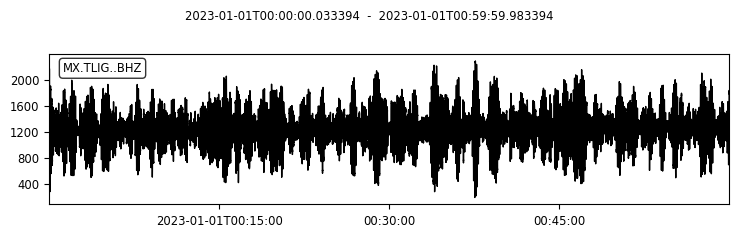

MX.TLIG..BHN | 2023-01-01T00:00:00.023393Z - 2023-01-01T00:59:59.973393Z | 20.0 Hz, 72000 samples


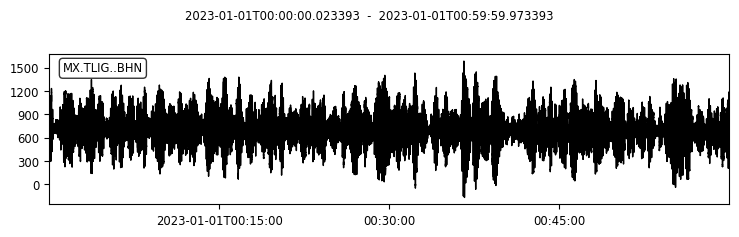

MX.TLIG..BHE | 2023-01-01T00:00:00.043393Z - 2023-01-01T00:59:59.993393Z | 20.0 Hz, 72000 samples


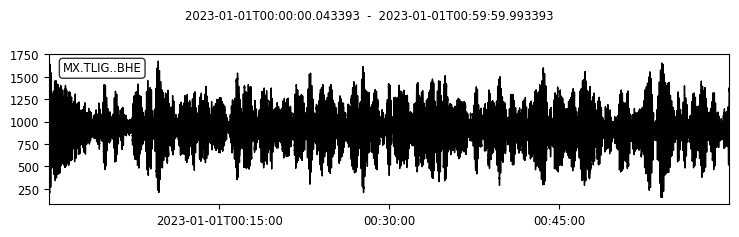

Could not retrieve data for channel HHZ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Could not retrieve data for channel HHN: No data available for request.
HTTP Status code: 204
Detailed response of server:


Could not retrieve data for channel HHE: No data available for request.
HTTP Status code: 204
Detailed response of server:


Could not retrieve data for channel HLZ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Could not retrieve data for channel HLN: No data available for request.
HTTP Status code: 204
Detailed response of server:


Could not retrieve data for channel HLE: No data available for request.
HTTP Status code: 204
Detailed response of server:




In [13]:
#plotting a waveform sample of each channel
channels = ['BHZ', 'BHN', 'BHE', 'HHZ', 'HHN', 'HHE', 'HLZ', 'HLN', 'HLE']

# Define your parameters
network = "MX"
station = "TLIG"
starttime = UTCDateTime("2023-1-1")
duration = 60 * 60  # 1 hour

# Initialize the client
client = Client("IRIS")

# Loop through each channel and get the waveforms
for channel in channels:
    try:
        st = client.get_waveforms(network, station, "", channel, starttime, starttime + duration)
        if len(st) > 0:
            trace = st[0]
            print(trace)
            # Plot the waveform (optional)
            trace.plot()
        else:                
            print(f"Data for channel {channel}:")
            print(st)
            st.plot()
    except Exception as e:
        print(f"Could not retrieve data for channel {channel}: {e}")


In [14]:
#Data saving fonction

def write_data(network, station_code, location, channel, starttime, endtime):
    try:      
        # Start time
        start_time = time.time()
        
        st = client.get_waveforms(network, station_code, location, channel, starttime, endtime)
        # Save the waveform data to a file
        filename = f"{network}_{station_code}_{channel}_{starttime.date}_{endtime.date}.mseed"
        st.write(filename, format='MSEED')
        # Check if the file was created
        if os.path.exists(filename):
            print(f"Data saved to {filename}")
            
            # Plot a sample of the data
            st.plot()
        else:
            print(f"Failed to save data to {filename}")
                # End time
        end_time = time.time()
        
        # Calculate elapsed time
        elapsed_time = end_time - start_time
        print(f"Time taken to execute the function: {elapsed_time:.2f} seconds")
        
    except Exception as e:
        print(f"Error fetching data for {network} {station_code}: {e}")
    return


In [15]:
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 1, 2)
network = "MX"
station_code = "MOIG"
channel = 'BHZ'
location = ""

#testing on 1 day data
#write_data(network, station_code, location, channel, starttime, endtime)

In [16]:
#testing on 1 month
endtime = UTCDateTime(2023, 2, 1)
#write_data(network, station_code, location, channel, starttime, endtime)


Saving output in markdown

Data saved to MX_MOIG_BHZ_2023-01-01_2023-02-01.mseed

Time taken to execute the function: 400.28 seconds

In [17]:

#testing on 1 year
endtime = UTCDateTime(2024, 1, 1)
#write_data(network, station_code, location, channel, starttime, endtime)

Saving output in markdown

Data saved to MX_MOIG_BHZ_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 498.43 seconds

Data saved to MX_MOIG_BHZ_2023-01-01_2023-01-02.mseed


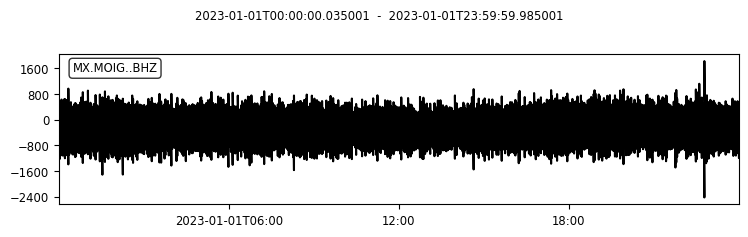

Time taken to execute the function: 2.52 seconds
Data saved to MX_MOIG_BHN_2023-01-01_2023-01-02.mseed


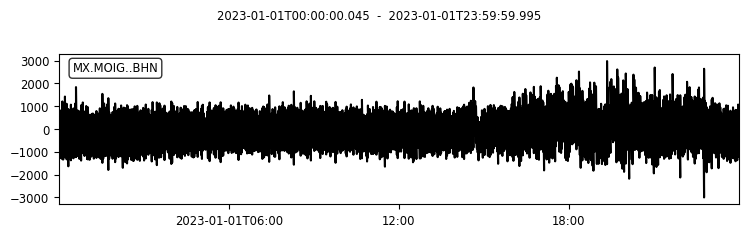

Time taken to execute the function: 3.99 seconds
Data saved to MX_MOIG_BHE_2023-01-01_2023-01-02.mseed


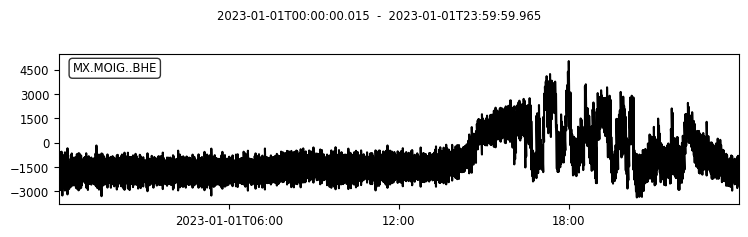

Time taken to execute the function: 2.45 seconds
Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data saved to MX_TLIG_BHZ_2023-01-01_2023-01-02.mseed


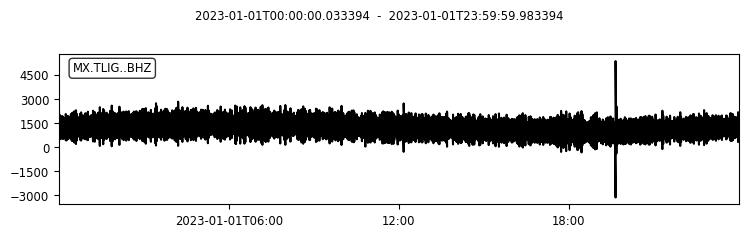

Time taken to execute the function: 9.36 seconds
Data saved to MX_TLIG_BHN_2023-01-01_2023-01-02.mseed


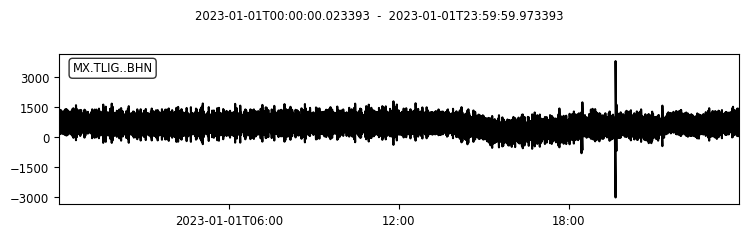

Time taken to execute the function: 9.33 seconds
Data saved to MX_TLIG_BHE_2023-01-01_2023-01-02.mseed


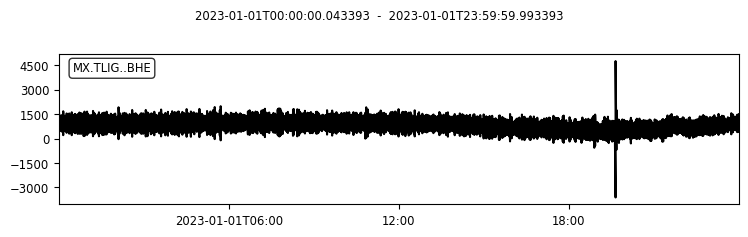

Time taken to execute the function: 9.19 seconds


In [18]:
#Saving 1 day of data for 3 channels of 3 stations

# Define your parameters
# Define the stations chosen for the project
stations = [
    {"network": "MX", "code": "MOIG", "name": "Morelia, Mich, MX"},
    {"network": "MX", "code": "SJQ", "name": "Juriquilla, Queretaro, Mexico"},
    {"network": "MX", "code": "TLIG", "name": "TLAPA"}
]
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 1, 2)
channels = ['BHZ', 'BHN', 'BHE']
location = ""

# Initialize the client
client = Client("IRIS")

# Loop through each channel and get the waveforms
for station in stations:
    network = station["network"]
    station_code = station["code"]    
    for channel in channels:
        write_data(network, station_code, location, channel, starttime, endtime)



Data saved to MX_MOIG_BHZ_2023-01-01_2023-02-01.mseed


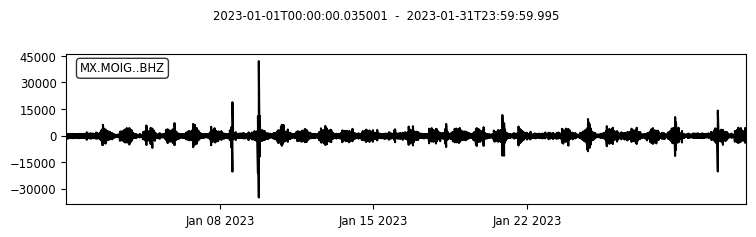

Time taken to execute the function: 409.70 seconds
Data saved to MX_MOIG_BHN_2023-01-01_2023-02-01.mseed


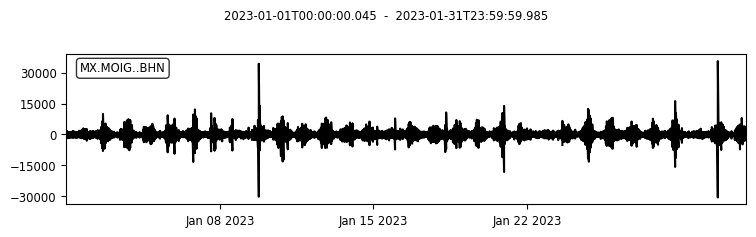

Time taken to execute the function: 468.42 seconds
Data saved to MX_MOIG_BHE_2023-01-01_2023-02-01.mseed


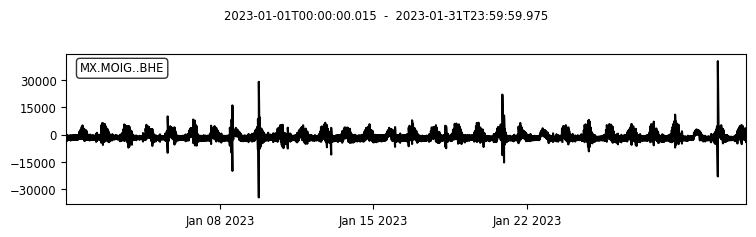

Time taken to execute the function: 399.40 seconds
Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data saved to MX_TLIG_BHZ_2023-01-01_2023-02-01.mseed


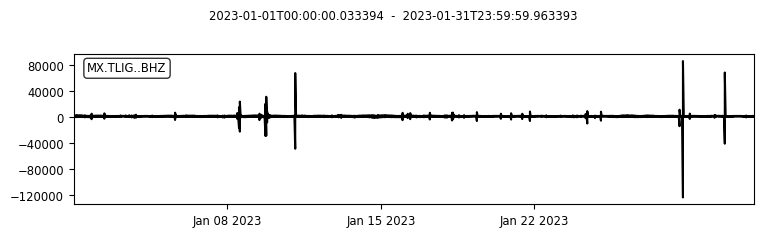

Time taken to execute the function: 272.81 seconds
Data saved to MX_TLIG_BHN_2023-01-01_2023-02-01.mseed


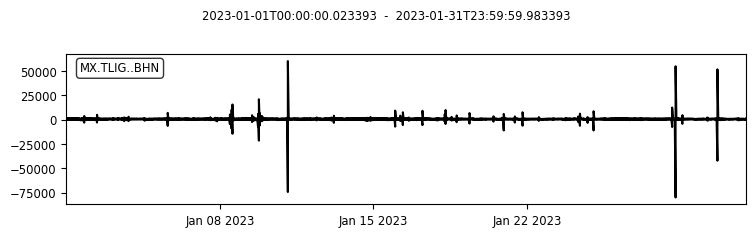

Time taken to execute the function: 271.67 seconds
Data saved to MX_TLIG_BHE_2023-01-01_2023-02-01.mseed


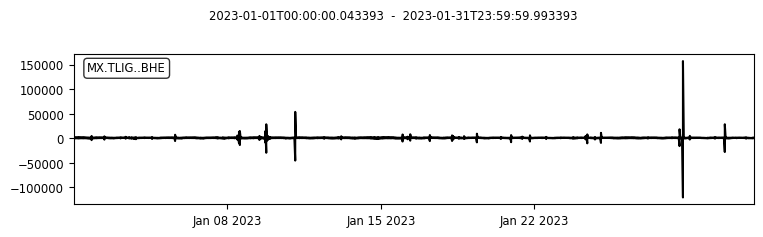

Time taken to execute the function: 290.60 seconds


In [19]:
#Saving 1 month of data for 3 channels of 3 stations

# Define your parameters
# Define the stations chosen for the project
stations = [
    {"network": "MX", "code": "MOIG", "name": "Morelia, Mich, MX"},
    {"network": "MX", "code": "SJQ", "name": "Juriquilla, Queretaro, Mexico"},
    {"network": "MX", "code": "TLIG", "name": "TLAPA"}
]
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 2, 1)
channels = ['BHZ', 'BHN', 'BHE']
location = ""

# Initialize the client
client = Client("IRIS")

# Loop through each channel and get the waveforms
for station in stations:
    network = station["network"]
    station_code = station["code"]    
    for channel in channels:
        write_data(network, station_code, location, channel, starttime, endtime)

Data saved to MX_MOIG_BHZ_2023-01-01_2024-01-01.mseed


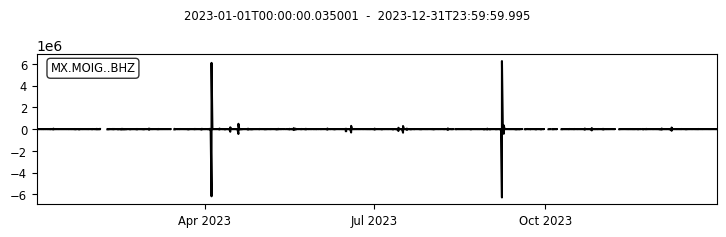

Time taken to execute the function: 4637.28 seconds
Data saved to MX_MOIG_BHN_2023-01-01_2024-01-01.mseed


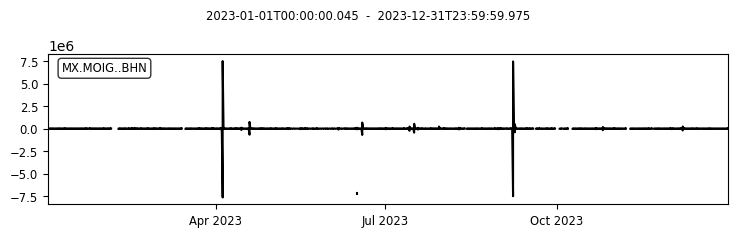

Time taken to execute the function: 556.09 seconds
Data saved to MX_MOIG_BHE_2023-01-01_2024-01-01.mseed


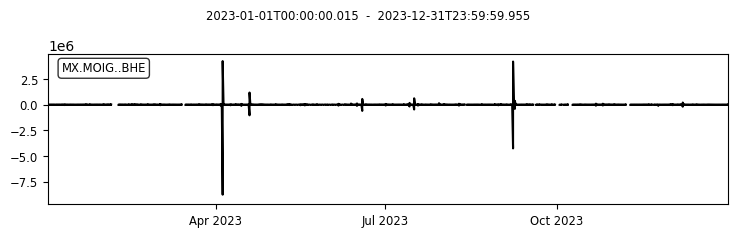

Time taken to execute the function: 4589.24 seconds
Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data saved to MX_TLIG_BHZ_2023-01-01_2024-01-01.mseed


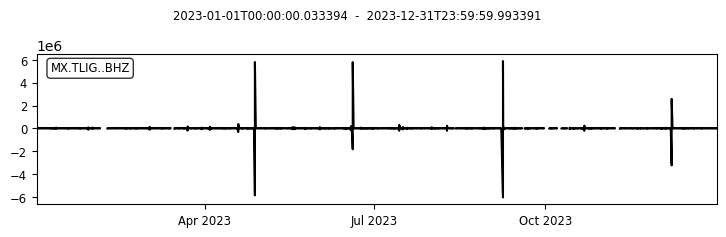

Time taken to execute the function: 466.67 seconds
Data saved to MX_TLIG_BHN_2023-01-01_2024-01-01.mseed


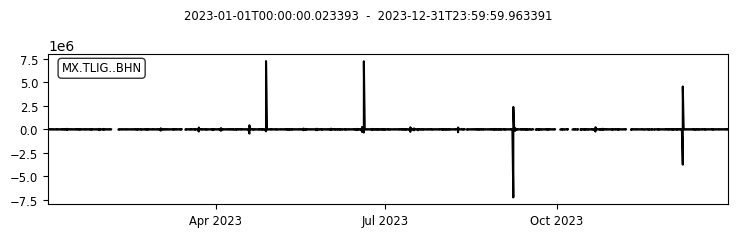

Time taken to execute the function: 3127.98 seconds
Data saved to MX_TLIG_BHE_2023-01-01_2024-01-01.mseed


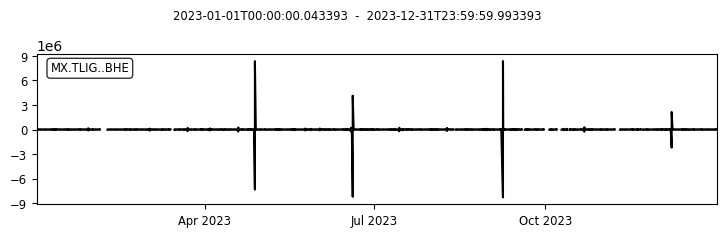

Time taken to execute the function: 3382.33 seconds


In [20]:
#Saving 1 year of data for 3 channels of 3 stations

# Define your parameters
# Define the stations chosen for the project
stations = [
    {"network": "MX", "code": "MOIG", "name": "Morelia, Mich, MX"},
    {"network": "MX", "code": "SJQ", "name": "Juriquilla, Queretaro, Mexico"},
    {"network": "MX", "code": "TLIG", "name": "TLAPA"}
]
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2024, 1, 1)
channels = ['BHZ', 'BHN', 'BHE']
location = ""

# Initialize the client
client = Client("IRIS")

# Loop through each channel and get the waveforms
for station in stations:
    network = station["network"]
    station_code = station["code"]    
    for channel in channels:
        write_data(network, station_code, location, channel, starttime, endtime)

#Saving the output in markdown since the cell take a long time to run.
Data saved to MX_MOIG_BHZ_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 4594.98 seconds
Data saved to MX_MOIG_BHN_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 500.67 seconds
Data saved to MX_MOIG_BHE_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 4653.54 seconds
Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data saved to MX_TLIG_BHZ_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 406.22 seconds
Data saved to MX_TLIG_BHN_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 3386.75 seconds
Data saved to MX_TLIG_BHE_2023-01-01_2024-01-01.mseed

Time taken to execute the function: 3137.25 seconds

In [21]:
#Testing for missing station data
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 1, 2)
network = "MX"
station_code = "SJQ"
channel = 'BHZ'
location = "00"

#testing on 1 day data
write_data(network, station_code, location, channel, starttime, endtime)

location = "01"
write_data(network, station_code, location, channel, starttime, endtime)

Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error fetching data for MX SJQ: No data available for request.
HTTP Status code: 204
Detailed response of server:


